# Apply Machine Learning Algorithms to Predict Average Rating of Books

In this notebook we will run a few Regression Machine Learning Algorithms to predict the **Average_Rating** of books based on some other features that we have extraced and cleaned so far.  
<br>Let's do that in the following steps:
1. Remove Text Columns/ Features not so appealing for Predictive Modelling
2. Convert Boolean Featues or Categorical Variables to Integer(0/1) values
3. Split the data into Training and Test set
4. Train the Regression Models with our Training DataSet 
5. Evaluate and Compare Accuracy of the different Models using our Test Dataset

In this notebooks we are going to explore the below Models:
   - Linear Regression using statsmodels (Ordinary Least Squares (OLS))
   - Linear Regression using sckit-learn
   - Decision Tree
   - Random Forest
   - Support Vector Regression or SVR

#### Import Libraries

In [1]:
# Metrics
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error
# Model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
##Plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import itertools
import seaborn as sns
# Remove warnings
import warnings
warnings.filterwarnings('ignore')
from pprint import pprint

#### Import DataFrame For Modelling

In [2]:
%store -r df_details

In [3]:
df_details.head(2)

,book_id,isbn,title,total_pages,average_rating,ratings_count,reviews_count,publication_date,publisher,book_description,...,year,yearn,yet,york,young,younger,youth,zero,zombi,zone
0,1,0439785960,Harry Potter and the Half-Blood Prince (Harry ...,652.0,4.56,1940880,26187,2006-09-16,Scholastic Inc.,When Harry Potter and the Half-Blood Prince op...,...,1,0,1,0,0,0,0,0,0,0
1,2,0439358078,Harry Potter and the Order of the Phoenix (Har...,870.0,4.49,1993215,27553,2004-09-01,Scholastic Inc.,There is a door at the end of a silent corrido...,...,1,0,0,0,0,0,0,0,0,0


### Preprocessing Data before fitting a Model

#### Delete not-required columns

Let's clean up the dataframe and remove the columns which we are not going to use for Modelling.

In [4]:
del df_details["book_id"]
del df_details["isbn"]
del df_details["title"]
del df_details["ratings_count"]
del df_details["reviews_count"]
del df_details["publisher"]
del df_details["hometown"]
del df_details["publication_date"]
del df_details["book_description"]
del df_details["word_list"]
del df_details["author_id"]
del df_details["author_name"]
del df_details["birth_on"]
del df_details["death_on"]

#### Convert Boolean Columns to Integer Columns

In [5]:
df_details["classics"] = df_details["classics"].astype(int)
df_details["thriller"] = df_details["thriller"].astype(int)
df_details["comics"] = df_details["comics"].astype(int)
df_details["romance"] = df_details["romance"].astype(int)
df_details["paranormal"] = df_details["paranormal"].astype(int)
df_details["historical"] = df_details["historical"].astype(int)
df_details["humour"] = df_details["humour"].astype(int)
df_details["dystopian"] = df_details["dystopian"].astype(int)

#### Convert Gender column to Integer Column

In [6]:
df_details["gender"] = df_details["gender"].replace('female',0)
df_details["gender"] = df_details["gender"].replace('male',1)
df_details["gender"] = df_details["gender"].replace('genderqueer',1)

In [7]:
df_details.head(2)

,total_pages,average_rating,fans_count,gender,works_count,classics,thriller,romance,paranormal,humour,...,year,yearn,yet,york,young,younger,youth,zero,zombi,zone
0,652.0,4.56,198576,0,191,1,1,1,1,0,...,1,0,1,0,0,0,0,0,0,0
1,870.0,4.49,198576,0,191,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


Befor starting our Modelling part, let's take a final look at the Average_rating data.

#### Plot Average Rating

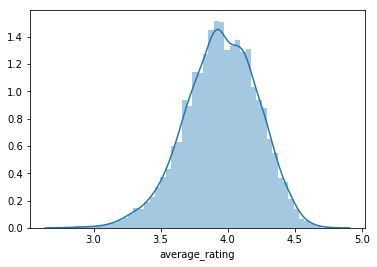

In [8]:
sns.distplot(df_details['average_rating'])

The Average Rating Data is Normally Distributed in our current Dataset.

## Apply Machine Learning Algorithms

#### Train Test Split

In [9]:
#X = df_details[df_details.columns - ["average_rating"],axis=1]
X = df_details.loc[:, df_details.columns != "average_rating"]
y = df_details.filter(['average_rating'],axis =1)

In [10]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7660, 2218)
(7660, 1)
(1916, 2218)
(1916, 1)


### Create a Dummy Regression Model which Always Predicts The Mean Value

A DummyRegressor is a simple baseline model that makes predictions using  some simple rules. It is used to compare with other (real) regressors modelling done next.

In [12]:
from sklearn.dummy import DummyRegressor
# Create a dummy regressor
dummy_mean = DummyRegressor(strategy='mean')
# "Train" dummy regressor
dummy_mean.fit(X_train, y_train)
dummy_mean.score(X_test, y_test)

-0.002619627135581837

Well, that score is really low. Let's try some Machine Learning Regression Algorithm and see how the prediction goes.

### Model 1: Train a Linear Regression With statsmodels

**Statsmodel** is a Python library designed for more statistically-oriented approaches to data analysis. It has some built in support for many of the statistical tests to check the quality of the fit and a dedicated set of plotting functions to visualize and diagnose the fit. 

In [12]:
### STATSMODELS ###
model_ols = ols(formula='y ~ X', data=df_details).fit()

In [13]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     2.612
Date:                Fri, 14 Jun 2019   Prob (F-statistic):          5.05e-200
Time:                        10:13:39   Log-Likelihood:                 1641.5
No. Observations:                9576   AIC:                             1155.
Df Residuals:                    7357   BIC:                         1.706e+04
Df Model:                        2218                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8731      0.010    390.131      0.0

#### Predictions from OLS Model

In [14]:
# Predict values
y_pred_ols = model_ols.predict()
y_pred_ols = y_pred_ols.round(2)

The Adjusted $R^2$ Score using the Statsmodel is **0.272** which is not so bad. Let's try some other models and see if we can get a better fit.

#### Plot Fitted Values Vs Residuals For Average Rating

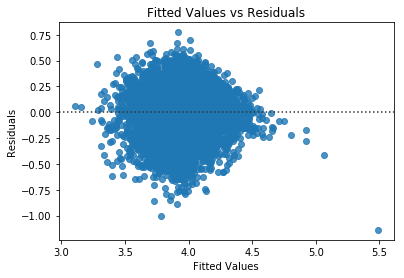

In [15]:
sns.residplot(model_ols.fittedvalues,model_ols.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title('Fitted Values vs Residuals')
plt.show()

#### Quantile Plot of the Residuals

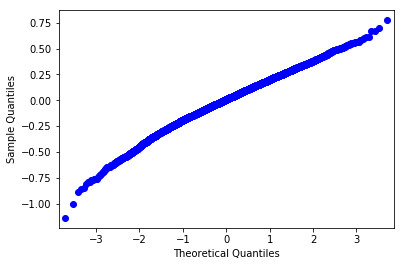

In [16]:
fig = sm.qqplot(model_ols.resid)
plt.show()

### Model 2: Train a Linear Regression Model With scikit-learn

In [17]:
# Create the regressor: reg
lm = linear_model.LinearRegression()
# Fit the regressor to the training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Predictions from Linear Regression Model

In [18]:
# Predict on the test data: y_pred
y_pred_lm = lm.predict(X_test)
y_pred_lm = y_pred_lm.round(2)

#### Plot Actual Values Vs Predicted Values For Average Rating

Text(0.5, 1.0, 'Actual Values Vs Predicted Values For Linear Regression')

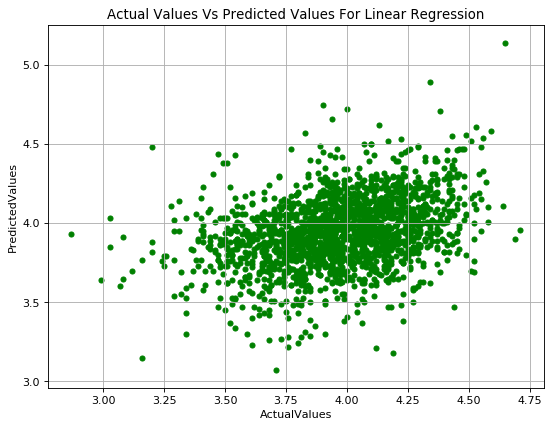

In [19]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_pred_lm,color = 'green', s= 20.0)
plt.grid(True)
plt.xlabel("ActualValues")
plt.ylabel("PredictedValues")
plt.title("Actual Values Vs Predicted Values For Linear Regression")

In [20]:
print('R^2 Score for Linear Regression Model:', round(lm.score(X_test, y_test),4))
###. Using Metrics
print('Linear Regression Accuracy: ', metrics.r2_score(y_test, y_pred_lm))
print('Mean Absolute Error for Linear Regression Model:', round(metrics.mean_absolute_error(y_test, y_pred_lm),4))  
print('Mean Squared Error for Linear Regression Model:', round(metrics.mean_squared_error(y_test, y_pred_lm),4))   
print('Root Mean Squared Error for Linear Regression Model:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lm)),4))

R^2 Score for Linear Regression Model: -0.0999
Linear Regression Accuracy:  -0.10041472342313096
Mean Absolute Error for Linear Regression Model: 0.2187
Mean Squared Error for Linear Regression Model: 0.0789
Root Mean Squared Error for Linear Regression Model: 0.2809


R<sup>2</sup> score is -0.1 for the Linear Regression Model which means the Model does not follow the trend of the data and thus fits worse than a horizontal line. <br>Let's use a 10 Fold Cross Validation and see the result.

#### Check Acuuracy using cross validation (KFold method)

In [21]:
y_pred_kf_lr = cross_val_predict(lm, X, y, cv=10 )
#Linear Regression Accuracy with cross validation (KFold method)
accuracy_lf = metrics.r2_score(y, y_pred_kf_lr)
print('Cross-Predicted(KFold) Mutiple Linear Regression Accuracy: ', accuracy_lf)

Cross-Predicted(KFold) Mutiple Linear Regression Accuracy:  -0.037748184075384605


Scikit Linear Regressor is not doing so good on our current Dataset. Let's try a Decision Tree Model!

### Model 3: Train a Decision Tree Regression Model

In [22]:
dt_regressor = DecisionTreeRegressor(random_state = 1)
dt_regressor.fit(X_train,y_train)

#Predicting the AverageRating using test set 
y_pred_dt = dt_regressor.predict(X_test)
y_pred_dt = y_pred_dt.round(2)

#### Plot Actual Values Vs Predicted Values For Average Rating

Text(0.5, 1.0, 'Actual Values Vs Predicted Values For Decision Tree Regression')

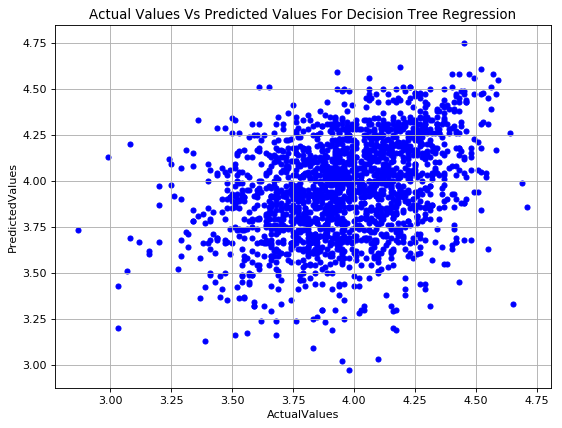

In [23]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_pred_dt,color = 'blue', s= 20.0)
plt.grid(True)
plt.xlabel("ActualValues")
plt.ylabel("PredictedValues")
plt.title("Actual Values Vs Predicted Values For Decision Tree Regression")

In [24]:
print('R^2 Score for Decision Tree Regression Model:', round(dt_regressor.score(X_test, y_test),4))
###. Using Metrics
print('Decision Tree Regression Accuracy: ', metrics.r2_score(y_test, y_pred_dt))
print('Mean Absolute Error for Decision Tree Regression Model:', round(metrics.mean_absolute_error(y_test, y_pred_dt),4))  
print('Mean Squared Error for Decision Tree Regression Model:', round(metrics.mean_squared_error(y_test, y_pred_dt),4))   
print('Root Mean Squared Error for Decision Tree Regression Model:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)),4))

R^2 Score for Decision Tree Regression Model: -0.3
Decision Tree Regression Accuracy:  -0.300068948752956
Mean Absolute Error for Decision Tree Regression Model: 0.2357
Mean Squared Error for Decision Tree Regression Model: 0.0932
Root Mean Squared Error for Decision Tree Regression Model: 0.3054


R<sup>2</sup> score is more negative for the Decision Tree Model. So,even a Decision Tree is not our answer!

#### Check Accuracy of the Model using cross validation (KFold method)

In [25]:
#Predicting the AverageRating using cross validation (KFold method)
y_pred_dt = cross_val_predict(dt_regressor, X, y, cv=10 )
#Decision Tree Regression Accuracy with cross validation
accuracy_dt = metrics.r2_score(y, y_pred_dt)
print('Cross-Predicted(KFold) Decision Tree Regression Accuracy: ', accuracy_dt)

Cross-Predicted(KFold) Decision Tree Regression Accuracy:  -0.3561900020458004


### Model 4: Train a Random Forest Model

#### Random Search Cross Validation in Scikit-Learn

In [26]:
rf = RandomForestRegressor(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


#### Random Hyperparameter Grid

In [27]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


#### Random Search Training

In [28]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

In [30]:
scores = ['precision', 'recall']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    # Fit the random search model
    rf_random.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(rf_random.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = rf_random.cv_results_['mean_test_score']
    stds = rf_random.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, rf_random.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print()

# Tuning hyper-parameters for precision

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 116.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 581.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 1177.2min finished


Best parameters set found on development set:

{'n_estimators': 900, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}

Grid scores on development set:

0.195 (+/-0.018) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
0.106 (+/-0.012) for {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
0.114 (+/-0.009) for {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
-0.142 (+/-0.039) for {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': False}
0.110 (+/-0.008) for {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
0.200 (+/-0.015) for {'n_estimato

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 107.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 576.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 1165.2min finished


Best parameters set found on development set:

{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}

Grid scores on development set:

0.199 (+/-0.024) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
0.107 (+/-0.012) for {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
0.113 (+/-0.012) for {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
-0.142 (+/-0.038) for {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': False}
0.106 (+/-0.011) for {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
0.202 (+/-0.016) for {'n_estimator

In [31]:
#import pickle
from joblib import dump, load
dump(rf_random, 'filename.joblib') 

['filename.joblib']

Now, let's prepare a Random Forest Model with the best paramaters based on the results of Random Search.

In [32]:
random_model = RandomForestRegressor(n_estimators = 900,
                                     min_samples_split= 2,
                                     min_samples_leaf= 2, 
                                     max_features='auto',
                                     max_depth=None,
                                     bootstrap= True,
                                     random_state = 42)
random_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [33]:
#Predicting the AverageRating using test set 
y_pred_random = random_model.predict(X_test)
y_pred_random = y_pred_random.round(2)

In [34]:
print('R^2 Score for Random Forest Model:', round(random_model.score(X_test, y_test),4))
###. Using Metrics
print('Random Forest Accuracy: ', metrics.r2_score(y_test, y_pred_random))
print('Mean Absolute Error for Random Forest Model:', round(metrics.mean_absolute_error(y_test, y_pred_random),4))  
print('Mean Squared Error for Random Forest Model:', round(metrics.mean_squared_error(y_test, y_pred_random),4))   
print('Root Mean Squared Error for Random Forest Model:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_random)),4))

R^2 Score for Random Forest Model: 0.3443
Random Forest Accuracy:  0.34352433908866864
Mean Absolute Error for Random Forest Model: 0.1695
Mean Squared Error for Random Forest Model: 0.0471
Root Mean Squared Error for Random Forest Model: 0.217


#### Plot Features Importance

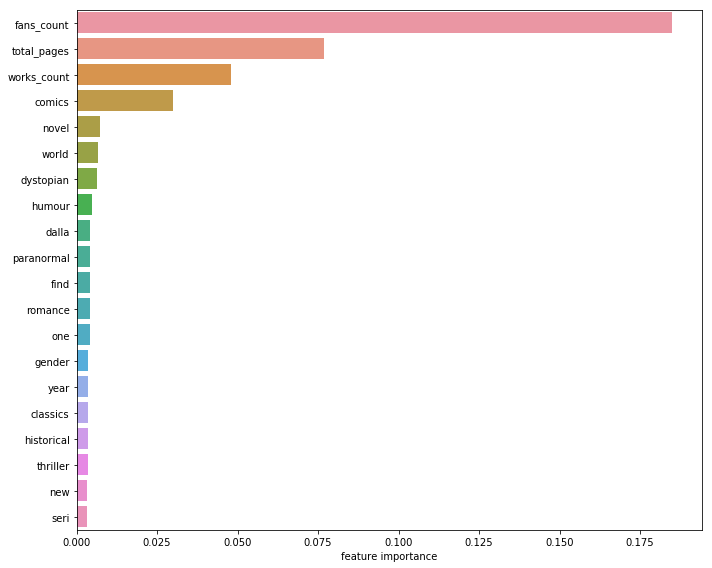

In [35]:
f, ax = plt.subplots(figsize=(10, 8))
ranking = np.argsort(-random_model.feature_importances_)
ax = sns.barplot(x=random_model.feature_importances_[ranking][:20], y=X_train.columns.values[ranking][:20], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

#### Reduce Parameters and fit a Random Forest

In [36]:
feature_importances = random_model.feature_importances_[ranking]
sorted_importances = [importance for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 1287


In [37]:
# Create training and testing sets with only the important features
X_imp_train = X_train.iloc[:,ranking[:1287]]
X_imp_test  = X_test.iloc[:,ranking[:1287]]

### Random Forest Final Version

Now, Let's use the default Random Forest Model on reduced features and see the result.

In [38]:
rf_imp = RandomForestRegressor(n_estimators=200,random_state=42)
fit_imp = rf_imp.fit(X_imp_train, y_train)

#### Predictions from Final Random Forest Model

In [39]:
y_rf_imp = rf_imp.predict(X_imp_test)  
y_rf_imp = y_rf_imp.round(2)

In [40]:
print('R^2 Score for Random Forest Model:', round(rf_imp.score(X_imp_test, y_test),4))
###. Using Metrics
print('Random Forest Accuracy: ', metrics.r2_score(y_test, y_rf_imp))
print('Mean Absolute Error for Random Forest Model:', round(metrics.mean_absolute_error(y_test, y_rf_imp),4))  
print('Mean Squared Error for Random Forest Model:', round(metrics.mean_squared_error(y_test, y_rf_imp),4))   
print('Root Mean Squared Error for Random Forest Model:', round(np.sqrt(metrics.mean_squared_error(y_test, y_rf_imp)),4))

R^2 Score for Random Forest Model: 0.3489
Random Forest Accuracy:  0.3484098029832694
Mean Absolute Error for Random Forest Model: 0.1687
Mean Squared Error for Random Forest Model: 0.0467
Root Mean Squared Error for Random Forest Model: 0.2162


So far, **Random Forest** with 1287 top ranking features is the best Model with a score of **0.35**. 

### Model 5: Train a Support Vector Regression Model

Finally, let's try a Supoort Vector Regression Model with the Reduced Features and see the result.

In [41]:
clf = SVR()
clf.fit(X_imp_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

#### Predictions from SVR Model

In [42]:
y_pred_svm = clf.predict(X_imp_test)  
y_pred_svm = y_pred_svm.round(2)

#### Plot Actual Values Vs Predicted Values For Average Rating

Text(0.5, 1.0, 'Actual Values Vs Predicted Values For SVM')

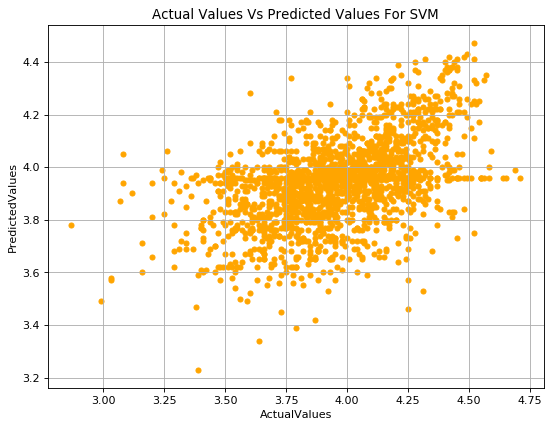

In [43]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_pred_svm,color = 'orange', s= 20.0)
plt.grid(True)
plt.xlabel("ActualValues")
plt.ylabel("PredictedValues")
plt.title("Actual Values Vs Predicted Values For SVM")

In [44]:
print('R^2 Score for SVR Model:', round(clf.score(X_imp_test, y_test),4))
###. Using Metrics
print('SVR Model Accuracy: ', metrics.r2_score(y_test, y_pred_svm))
print('Mean Absolute Error for SVR Model:', round(metrics.mean_absolute_error(y_test, y_pred_svm),4))  
print('Mean Squared Error for SVR Model:', round(metrics.mean_squared_error(y_test, y_pred_svm),4))   
print('Root Mean Squared Error for SVR Model:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_svm)),4))

R^2 Score for SVR Model: 0.2384
SVR Model Accuracy:  0.23792366174223845
Mean Absolute Error for SVR Model: 0.1801
Mean Squared Error for SVR Model: 0.0547
Root Mean Squared Error for SVR Model: 0.2338


## Conclusion

We have implemented different models to predict the **Average_Rating** of a book and the **Random Forest Model** with reduced features did the best. 

#### Compare Actual Values vs Predicted Values for different Models

In [47]:
actual_values = np.asarray(y_test.average_rating)
#y_pred_lm = y_pred_lm.tolist()
#y_pred_lm = list(itertools.chain.from_iterable(y_pred_lm))
lm_pred_values = np.asarray(y_pred_lm)
rf_pred_values = np.asarray(y_rf_imp)
svr_pred_values = np.asarray(y_pred_svm)
results = pd.DataFrame({'actual_values':actual_values, 
                        'lm_pred_values':lm_pred_values,
                        'rf_pred_values':y_rf_imp,
                        'svr_pred_values':svr_pred_values})
results.head()

,actual_values,lm_pred_values,rf_pred_values,svr_pred_values
0,3.81,4.01,3.79,3.85
1,3.94,4.20,3.88,3.94
2,3.56,3.63,3.78,3.50
3,4.20,3.87,4.07,4.09
4,3.94,4.19,3.95,3.98


[Text(0, 0, 'actual_values'),
 Text(0, 0, 'lm_pred_values'),
 Text(0, 0, 'rf_pred_values'),
 Text(0, 0, 'svr_pred_values')]

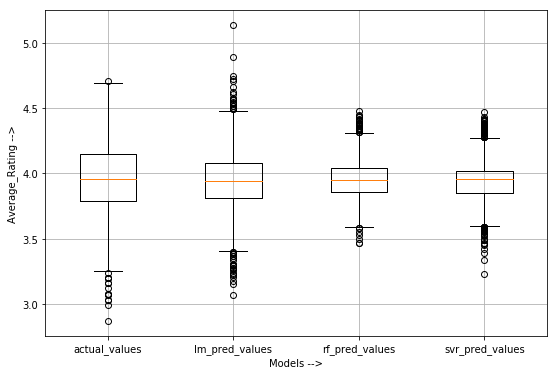

In [48]:
values = [results.actual_values,results.lm_pred_values,results.rf_pred_values,results.svr_pred_values]
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)
ax.grid(True)
# Create the boxplot
bp = ax.boxplot(values)
ax.set_xlabel('Models -->')
ax.set_ylabel('Average_Rating -->')
ax.set_xticklabels(['actual_values', 'lm_pred_values', 'rf_pred_values','svr_pred_values'])
#ax.set_yticklabels(['3.0', '3.25', '3.5','3.75','4.0','4.25','4.5','4.75','5.0','5.25'])

In [49]:
print("Actual Mean:", round(np.mean(results.actual_values),3))
print("LinearRegression Mean:",round(np.mean(results.lm_pred_values),3))
print("RandomForest Mean:",round(np.mean(results.rf_pred_values),3))
print("SVR Mean:",round(np.mean(results.svr_pred_values),3))

Actual Mean: 3.96
LinearRegression Mean: 3.941
RandomForest Mean: 3.953
SVR Mean: 3.942


In [73]:
from IPython.display import HTML, display
import tabulate
table = [["Model","R2 Score","Mean Absolute Error","Root Mean Squared Error"],
         ["Linear Regression","-0.100","0.218","0.280"],
         ["Decision Tree","-0.300","0.235","0.305"],
         ["Random Forest","0.348","0.169","0.216"],
         ["Support Vector Regressor","0.238","0.180" ,"0.233"]
        ]
display(HTML(tabulate.tabulate(table, tablefmt='html',headers="firstrow")))

Model,R2 Score,Mean Absolute Error,Root Mean Squared Error
Linear Regression,-0.1,0.218,0.28
Decision Tree,-0.3,0.235,0.305
Random Forest,0.348,0.169,0.216
Support Vector Regressor,0.238,0.18,0.233


Although the other Models did okay, **Random Forest Model** is the best fit with the score of 0.35!